In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

[1 3 2 4 1 6 4]


In [2]:
# Examine DataFrame
if True:
    print (example_df)

   value   even  above_three
a      1  False        False
b      3  False        False
c      2   True        False
d      4   True         True
e      1  False        False
f      6   True         True
g      4   True         True


In [3]:
# Examine groups
if True:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print (grouped_data.groups)

{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [4]:
# Group by multiple columns
if True:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print (grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [8]:
# Get sum of each group
if True:
    grouped_data = example_df.groupby('even')
    print (grouped_data.sum())

       value  above_three
even                     
False      5          0.0
True      16          3.0


In [12]:
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print (grouped_data.sum())
    print ('\n')
    print (grouped_data.sum()['value'])
    
    print ('\n') # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print (grouped_data['value'].sum())

       value  above_three
even                     
False      5          0.0
True      16          3.0


even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [17]:

filename = "D:\\Education\\MachineLearning\\Videos\\01 - Introduction to Programming\\Lesson 10 - Numpy & Pandas II\\data\\nyc-subway-weather.csv"
subway_df = pd.read_csv(filename)
print (subway_df.head())

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   
2  R003  05-01-11  12:00:00   4388333  2911002              0.0   
3  R003  05-01-11  16:00:00   4388333  2911002              0.0   
4  R003  05-01-11  20:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   
2            0.0  2011-05-01 12:00:00    12         6     ...           30.28   
3            0.0  2011-05-01 16:00:00    16         6     ...           30.26   
4            0.0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0     

In [29]:
day_week_group = subway_df.groupby("day_week")
ridership_day = day_week_group.mean()["ENTRIESn_hourly"]

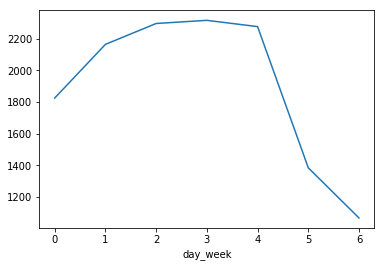

In [32]:
import seaborn as sn
ridership_day.plot()